In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, struct

import powerbox as pbox

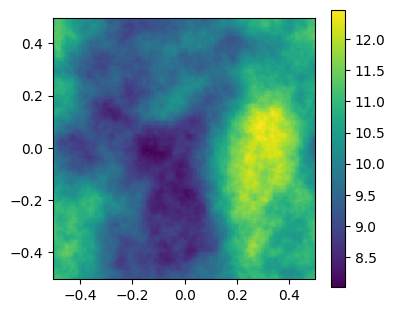

In [24]:
power = lambda k : k**(-11./3.)
N = 200
dim = 2
boxlength = 1

pb = pbox.LogNormalPowerBox(
    N=N,                     # Number of grid-points in the box
    dim=dim,                     # 2D box
    pk = power, # The power-spectrum
    boxlength = boxlength,           # Size of the box (sets the units of k in pk)
    seed = 0,                # Set a seed to ensure the box looks the same every time (optional)
    ensure_physical=False
)

fig, ax = plt.subplots(1,1,figsize=(4,4),tight_layout=True)

mesh = ax.pcolormesh(pb.x,pb.x,(pb.delta_x()+1)*10)
ax.set_aspect(1)
fig.colorbar(mesh,shrink=.75)
plt.show()

In [27]:
n_points = N**dim

fname_o = f"rho0.dbl"
fdir = "/home/yangelaxue/Documents/VUW/pluto_runs/Empty/"

if not os.path.exists(fdir):
    os.makedirs(fdir)

with open(os.path.join(fdir, fname_o),'wb') as f_o:   
    f_o.write(struct.pack('<'+'d'*n_points,*((pb.delta_x()+1)*10).flatten()))

In [29]:
p_k_field, bins_field = pbox.get_power(pb.delta_x(), pb.boxlength)

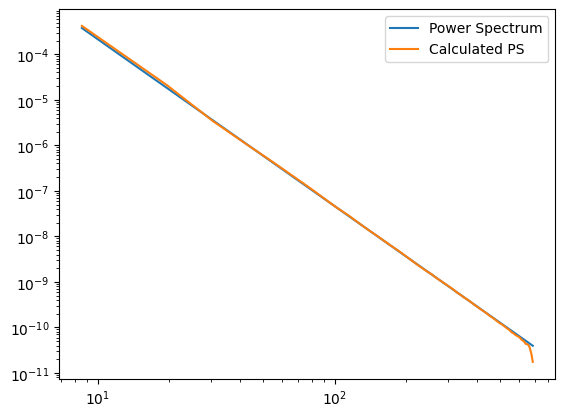

In [31]:
plt.plot(bins_field, power(bins_field), label="Power Spectrum")
plt.plot(bins_field, p_k_field,label="Calculated PS")

plt.yscale('log')
plt.xscale('log')
plt.legend()

In [34]:
bins_field.size

58

In [39]:
(3*(1**2))**.5 * 2 * np.pi

10.882796185405306